<a href="https://www.kaggle.com/code/prasadposture121/linear-regression-model?scriptVersionId=102749024" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Prasad Rajesh Posture  
**Batch**: June 2022  
Data Analytics with Python  

**Task :** Create a linear regression model for predicting the weight of the brain based on the size of the head.

### `import` packages

In [1]:
import warnings
warnings.filterwarnings("ignore")
# To ignore warnings that arise while executing the library methods

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Data exploration

Datasource : https://www.kaggle.com/datasets/jemishdonda/headbrain

In [3]:
data_source = '../input/headbrain/headbrain.csv'

In [4]:
# read data
df = pd.read_csv(data_source)
df=df.drop(['Gender','Age Range'],axis=1)

In [5]:
# shape
df.shape

(237, 2)

In [6]:
# head
df.head()

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


In [7]:
# Create Y and x (array)
Y = np.array(df['Brain Weight(grams)'].to_list())
x = np.array(df['Head Size(cm^3)'].to_list())

### Relation between x and Y:

In [8]:
# correlation
hb_corr = df.corr()

In [9]:
hb_corr

,Head Size(cm^3),Brain Weight(grams)
Head Size(cm^3),1.00000,0.79957
Brain Weight(grams),0.79957,1.00000


<AxesSubplot:>

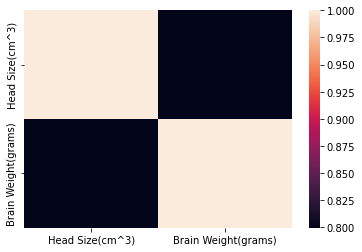

In [10]:
sns.heatmap(hb_corr)

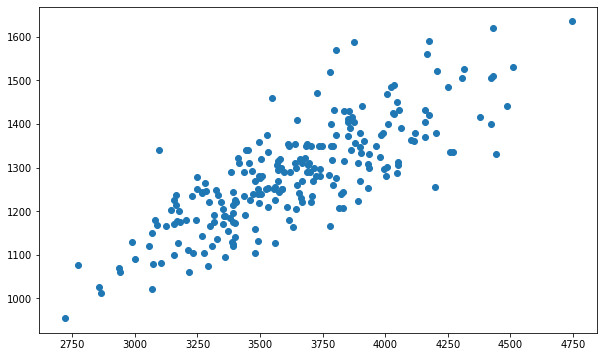

In [11]:
# scatter plot (10, 6)
plt.figure(figsize=(10, 6))
plt.scatter(x, Y)
plt.show()

There are outliers in our data.

### Outlier detection function

In [12]:
# whatever value is > 3 and < -3 is an outlier

def calculate_zscore(data_values):
    # mean
    mean_vals = np.mean(data_values)
    # standard deviation
    std_dev = np.std(data_values)
    # applying the formula for all the values
    zscore = np.array([(i - mean_vals)/std_dev for i in data_values])
    return zscore

In [13]:
def get_outlier_vals(data_values):
    # z_score values of all the data values
    z_scores = calculate_zscore(data_values=data_values)
    
    # get the index of the outlier
    # whose value is > 3
    # whose value is < -3
    inds = list(np.where(z_scores < -3)[0])
    inds.extend(list(np.where(z_scores > 3)[0]))
    
    outlier_vals = [data_values[i] for i in sorted(inds)]
    
    return outlier_vals

In [14]:
out_x = get_outlier_vals(data_values=x)
out_Y = get_outlier_vals(data_values=Y)
print(out_x)
print(out_Y)

[4747]
[]


### Seaborn plot with `confidence` level

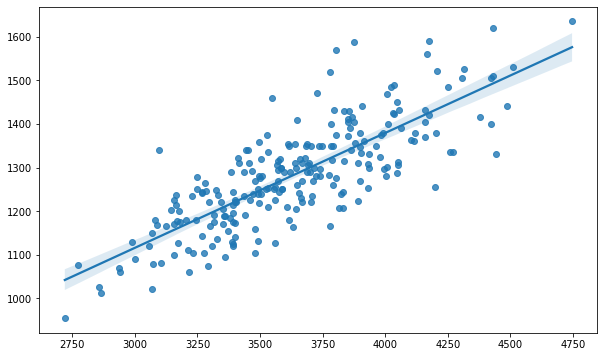

In [15]:
# confidence level
plt.figure(figsize=(10, 6))
sns.regplot(x, Y)
plt.show()

### Model Implementation

In [16]:
# b, a - polyfit
b, a = np.polyfit(x, Y, 1) # sgd

In [17]:
# b : slope
b

0.26342933948939934

In [18]:
# a : intercept
a

325.57342104944274

### Broadcasting

In [19]:
# y_preds = bx + a
y_preds = (b * x) + a

### Best fit line

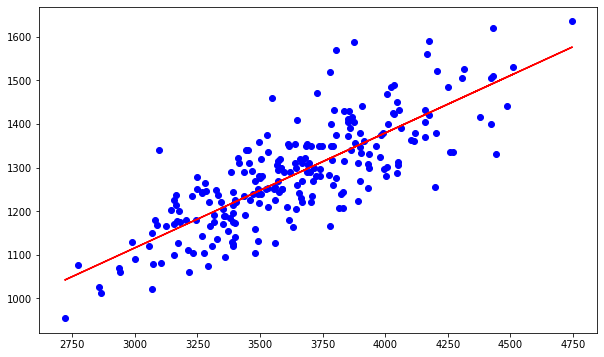

In [20]:
# scatter and line
plt.figure(figsize=(10, 6))
plt.scatter(x, Y, color='blue')
plt.plot(x, y_preds, color='red')
plt.show()

### Plotly plot for interactivity

In [21]:
import plotly.graph_objects as go

In [22]:
trace1 = go.Scatter(
    x=x,
    y=Y,
    mode='markers',
    name='Data Values'
)

trace2 = go.Scatter(
    x=x,
    y=y_preds,
    mode='lines',
    name='Best Fit Line'
)

layout = go.Layout(
    title='Linear Regression Model (Brain weight & Head Size)',
    height=500,
    width=800,
    margin=dict(l=0, b=10, t=50, r=0)
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

### Model development

In [23]:
def build_model(X, y):
    x_dim = 1 if (len(X.shape) == 1) else X.shape[1]
    b, a = np.polyfit(x=X, y=y, deg=x_dim)
    return b, a

In [24]:
b, a = build_model(X=x, y=Y)

### Prediction

In [25]:
def predict(X_new, b, a):
    X_new = np.array(X_new)
    y_preds = (b * X_new) + a
    return list(y_preds)

In [26]:
#Predicting the weight of the brain based on the size of the head
predict(X_new=[5512,3438,4161,3977,4677,5585,3785,3759,2982,3453,3903,3140,4288,4832,3786,3595], b=b, a=a)

[1777.5959403150118,
 1231.2434902139976,
 1421.7029026648333,
 1373.231904198784,
 1557.6324418413633,
 1796.826282097738,
 1322.6534710168191,
 1315.8043081900948,
 1111.1197114068316,
 1235.1949303063386,
 1353.7381330765684,
 1152.7415470461567,
 1455.1584287799872,
 1598.4639894622203,
 1322.9169003563086,
 1272.6018965138333]

The End